[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/alan-turing-institute/MLJ.jl/master?filepath=binder%2FMLJ_demo.ipynb)

<img src="https://julialang.org/assets/infra/logo.svg" alt="Julia" width="200" style="max-width:100%;">

# A taste of the Julia programming language and the MLJ machine learning toolbox

This first cell instantiates a Julia project environment, reproducing a collection of mutually compatible packages for use in this demonstration:

In [1]:
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

Activating environment at `~/Dropbox/Julia7/MLJ/MLJ/binder/Project.toml`


## Lightning encounter with Julia programming language

###### Julia related content prepared by [@ablaom](https://github.com/ablaom)

Interacting with Julia at the REPL, or in a notebook, feels very much

the same as python, MATLAB or R:

In [2]:
print("Hello world!")

Hello world!

In [3]:
2 + 2

4

In [4]:
typeof(42.0)

Float64

## Just-in-time compilation

Here's a function used in generating the famous Mandelbrot set,

which looks pretty much the same in python, MATLAB or R:

In [2]:
function mandel(z)
    c = z
    maxiter = 80
    for n in 1:maxiter
        if abs(z) > 2
            return n-1
        end
        z = z^2 + c
    end
    return maxiter
end

mandel (generic function with 1 method)

In particular, notice the absence of type annotations. The crucial difference is what happens when you call this function (**remove leading`#` before evaluating next four cells**):

In [6]:
# @elapsed mandel(1.2)  # time call on a Float64

  0.007121 seconds (21.31 k allocations: 1.197 MiB)


1

This is actually pretty lousy, slower than python. (If you are running this notebook using binder you may not see this - known issue.) However, trying again:

In [7]:
# @elapsed mandel(3.4)   # time on another Float64

  0.000002 seconds (4 allocations: 160 bytes)


0

Thousands of times faster, second time around! What happenend?

When you call `mandel(1.2)` in python, say, then the defining code
is interpreted each time. When you call `mandel(1.2)` in Julia for
the first time Julia inspects the of the argument, namely `Float64`,
and using this information *compiles* an efficient type-specfic
version of `mandel`, which it caches for use in any subsequent call
*on the same type*. Indeed if we call `mandel` on a new type, a new
compilation will be needed:

In [8]:
# @elapsed mandel(1.0 + 5.0im)

  0.033819 seconds (93.55 k allocations: 4.975 MiB)


0

Second time with a complex input:

In [9]:
# @elapsed mandel(2.0 + 0.5im)

  0.000005 seconds (6 allocations: 224 bytes)


0

Since plotting the Mandelbrot set means calling `mandel` millions of
times on the same type, the advantage of just-in-time compilation is
obvious.

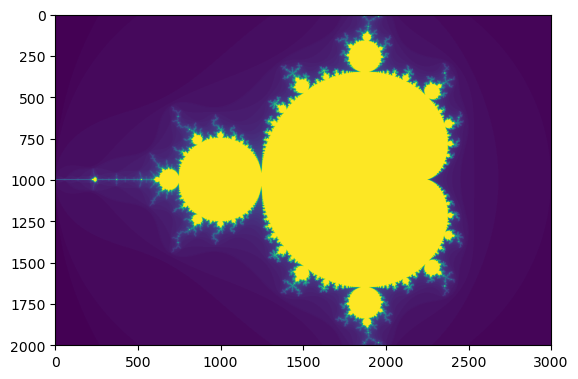

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/anthony/.julia/packages/PyPlot/XHEG0/src/init.jl:192


PyObject <matplotlib.image.AxesImage object at 0x14b6b41d0>

In [10]:
using PyPlot

# plt.imshow([mandel(x + y * im) for y = -1:0.001:1, x = -2:0.001:1])

## Multiple dispatch

You will never see anything like `A.add(B)` in Julia because Julia
is not a traditional object-oriented language. In Julia, function and
structure are kept separate, with the help of abstract types and
multiple dispatch, as we explain next
In addition to regular concrete types, such as `Float64` and
`String`, Julia has a built-in heirarchy of *abstract* types. These
generally have subtypes but no instances:

In [11]:
typeof(42)

Int64

In [12]:
supertype(Int64)

Signed

In [13]:
supertype(Signed)

Integer

In [14]:
subtypes(Integer)

3-element Array{Any,1}:
 Bool    
 Signed  
 Unsigned

In [15]:
Bool <: Integer # is Bool a subtype of Integer?

true

In [16]:
Bool <: String

false

In Julia, which is optionally typed, one uses type annotations to
adapt the behaviour of functions to their types. If we define

In [17]:
divide(x, y) = x / y

divide (generic function with 1 method)

then `divide(x, y)` will make sense whenever `x / y` makes sense (for
the built-in function `/`). For example, we can use it to divide two
integers, or two matrices:

In [18]:
divide(1, 2)

0.5

In [19]:
divide([1 2; 3 4], [1 2; 3 7])

2×2 Array{Float64,2}:
 1.0  -0.0
 9.0  -2.0

To vary the behaviour for specific types we make type annotatations:

In [20]:
divide(x::Integer, y::Integer) = floor(x/y)
divide(x::String, y::String) = join([x, y], " / ")
divide(1, 2)

0.0

In [21]:
divide("Hello", "World!")

"Hello / World!"

In the case of `Float64` the original "fallback" method still
applies:

In [22]:
divide(1.0, 2.0)

0.5

## User-defined types

Users can define their own abstract types and composite types:

In [23]:
abstract type Organism end

struct Animal <: Organism
    name::String
    is_hervibore::Bool
end

struct Plant <: Organism
    name::String
    is_flowering::Bool
end

describe(o::Organism) = string(o.name) # fall-back method
function describe(p::Plant)

    if p.is_flowering
        text = " is a flowering plant."
    else
        text = " is a non-flowering plant."
    end
    return  p.name*text

end

describe (generic function with 2 methods)

In [24]:
describe(Animal("Elephant", true))

"Elephant"

In [25]:
describe(Plant("Fern", false))

"Fern is a non-flowering plant."

For more on multiple dispatch, see this [blog post](http://www.stochasticlifestyle.com/type-dispatch-design-post-object-oriented-programming-julia/) by [Christopher Rackauckas](http://www.chrisrackauckas.com/).

## Automatic differentiation

Differentiation of almost arbitrary programs with respect to their input. ([source]( https://render.githubusercontent.com/view/ipynb?commit=89317894e2e5370a80e45d52db8a4055a4fdecd6&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d6174626573616e636f6e2f454d455f4a756c69615f776f726b73686f702f383933313738393465326535333730613830653435643532646238613430353561346664656364362f315f496e74726f64756374696f6e2e6970796e62&nwo=matbesancon%2FEME_Julia_workshop&path=1_Introduction.ipynb&repository_id=270611906&repository_type=Repository#Automatic-differentiation) by [@matbesancon](https://github.com/matbesancon))

In [26]:
using ForwardDiff

function sqrt_babylonian(s)
    x = s / 2
    while abs(x^2 - s) > 0.001
        x = (x + s/x) / 2
    end
    x
end

sqrt_babylonian (generic function with 1 method)

In [27]:
sqrt_babylonian(2) - sqrt(2)

2.123901414519125e-6

In [28]:
@show ForwardDiff.derivative(sqrt_babylonian, 2);
@show ForwardDiff.derivative(sqrt, 2);

ForwardDiff.derivative(sqrt_babylonian, 2) = 0.353541906958862
ForwardDiff.derivative(sqrt, 2) = 0.35355339059327373


## Unitful computations
Physicists' dreams finally made true. ([soure](https://render.githubusercontent.com/view/ipynb?commit=89317894e2e5370a80e45d52db8a4055a4fdecd6&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d6174626573616e636f6e2f454d455f4a756c69615f776f726b73686f702f383933313738393465326535333730613830653435643532646238613430353561346664656364362f315f496e74726f64756374696f6e2e6970796e62&nwo=matbesancon%2FEME_Julia_workshop&path=1_Introduction.ipynb&repository_id=270611906&repository_type=Repository#Unitful-computations) by [@matbesancon](https://github.com/matbesancon))

In [29]:
using Unitful
using Unitful: J, kg, m, s

┌ Info: Precompiling Unitful [1986cc42-f94f-5a68-af5c-568840ba703d]
└ @ Base loading.jl:1273


In [30]:
3J + 1kg * (1m / 1s)^2

4.0 kg m² s⁻²

<img src="https://github.com/alan-turing-institute/MLJ.jl/raw/master/material/MLJLogo2.svg?sanitize=true" alt="MLJ" width="200" style="max-width:100%;">

# MLJ

MLJ (Machine Learning in Julia) is a toolbox written in Julia
providing a common interface and meta-algorithms for selecting,
tuning, evaluating, composing and comparing machine learning models
written in Julia and other languages. In particular MLJ wraps a large
number of [scikit-learn](https://scikit-learn.org/stable/) models. 

## Key goals

* Offer a consistent way to use, compose and tune machine learning
  models in Julia,

* Promote the improvement of the Julia ML/Stats ecosystem by making it
  easier to use models from a wide range of packages,

* Unlock performance gains by exploiting Julia's support for
  parallelism, automatic differentiation, GPU, optimisation etc.


## Key features

* Data agnostic, train models on any data supported by the
  [Tables.jl](https://github.com/JuliaData/Tables.jl) interface,

* Extensive support for model composition (*pipelines* and *learning
  networks*),

* Convenient syntax to tune and evaluate (composite) models.

* Consistent interface to handle probabilistic predictions.

* Extensible [tuning
  interface](https://github.com/alan-turing-institute/MLJTuning.jl),
  to support growing number of optimization strategies, and designed
  to play well with model composition.


More information is available from the [MLJ design paper](https://github.com/alan-turing-institute/MLJ.jl/blob/master/paper/paper.md)

Here's how to genearate the full list of models supported by MLJ:

In [31]:
using MLJ
models()

142-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = ARDRegressor, package_name = ScikitLearn, ... )             
 (name = AdaBoostClassifier, package_name = ScikitLearn, ... )       
 (name = AdaBoostRegressor, package_name = ScikitLearn, ... )        
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... ) 
 (name = AffinityPropagation, package_name = ScikitLearn, ... )      
 (name = AgglomerativeClustering, package_name = ScikitLearn, ... )  
 (name = BaggingClassifier, package_name = ScikitLearn, ... )        
 (name = BaggingRegressor, package_name = ScikitLearn, ... )         
 (name = BayesianLDA, package_name = MultivariateStats, ..

## Performance evaluation

The following example shows how to evaluate the performance of supervised learning model in MLJ. We'll start by loading a canned data set that is very well-known:

In [32]:
X, y = @load_iris;

Here `X` is a table of input features, and `y` the target observations (iris species).

Next, we can inspect a list of models that apply immediately to this data:

In [33]:
models(matching(X, y))

42-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AdaBoostClassifier, package_name = ScikitLearn, ... )           
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )     
 (name = BaggingClassifier, package_name = ScikitLearn, ... )            
 (name = BayesianLDA, package_name = MultivariateStats, ... )            
 (name = BayesianLDA, package_name = ScikitLearn, ... )                  
 (name = BayesianQDA, package_name = ScikitLearn, ... )                  
 (name = BayesianSubspaceLDA, package_name = MultivariateStats, ... )    
 (name = ConstantClassifier, package_name = MLJModels, ... )             
 (name = DecisionTreeClassi

We'll choose one and invoke the `@load` macro, which simultaneously loads the code for the chosen model, and instantiates the model, using default hyper-parameters:

In [34]:
tree_model = @load RandomForestClassifier pkg=DecisionTree

RandomForestClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = -1,
    n_trees = 10,
    sampling_fraction = 0.7,
    pdf_smoothing = 0.0) @709

Now we can evaluate it's performance using, say, 6-fold cross-validation, and the `cross_entropy` performance measure:

In [35]:
evaluate(tree_model, X, y, resampling=CV(nfolds=6, shuffle=true), measure=cross_entropy)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:05


┌───────────────┬───────────────┬─────────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                  │
├───────────────┼───────────────┼─────────────────────────────────────────────┤
│ cross_entropy │ 0.0893        │ [0.14, 0.0216, 0.104, 0.109, 0.0582, 0.103] │
└───────────────┴───────────────┴─────────────────────────────────────────────┘
_.per_observation = [[[2.22e-16, 1.2, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 0.105], [2.22e-16, 0.357, ..., 0.357], [2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 0.105]]]


## Fit and predict

We'll now evaluate the peformance of our model by hand, but using a simple holdout set, to illustate a typical `fit!` and `predict` workflow. 

First note that a *model* in MLJ is an object that only serves as a container for the hyper-parameters of the model, and that's all.  A *machine* is an object binding a model to some data, and is where *learned* parameters are stored (among other things):

In [36]:
tree = machine(tree_model, X, y)

Machine{RandomForestClassifier} @047 trained 0 times.
  args: 
    1:	Source @200 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @688 ⏎ `AbstractArray{Multiclass{3},1}`


### Splitting the data

To split the data into a training and testing set, you can use the function `partition` to obtain indices for data points that should be considered either as training or testing data:

In [37]:
train, test = partition(eachindex(y), 0.7, shuffle=true) 
test[1:3]

3-element Array{Int64,1}:
  27
  54
 150

To fit the machine, you can use the function `fit!` specifying the rows to be used for the training:

In [38]:
fit!(tree, rows=train)

┌ Info: Training Machine{RandomForestClassifier} @047.
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/2UxSl/src/machines.jl:317


Machine{RandomForestClassifier} @047 trained 1 time.
  args: 
    1:	Source @200 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @688 ⏎ `AbstractArray{Multiclass{3},1}`


Note that this modifies the machine, which now contains the trained parameters of the decision tree. You can inspect the result of the fitting with the `fitted_params` method:

In [39]:
fitted_params(tree) 

(forest = Ensemble of Decision Trees
Trees:      10
Avg Leaves: 6.4
Avg Depth:  4.8,)

You can now use the machine to make predictions with the `predict` function specifying rows to be used for the prediction:

In [40]:
ŷ = predict(tree, rows=test)
@show ŷ[1]

┌ Warning: `predict(mach)` and `predict(mach, rows=...)` are deprecated. Data or nodes should be explictly specified, as in `predict(mach, X)`. 
│   caller = ip:0x0
└ @ Core :-1


ŷ[1] = UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>0.0, virginica=>0.0)


UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>0.0, virginica=>0.0)

Note that the output is probabilistic, effectively a vector with a score for each class. You could get the mode by using the `mode` function on `ŷ` or using `predict_mode`:

In [41]:
ȳ = predict_mode(tree, rows=test)
@show ȳ[1]
@show mode(ŷ[1])

┌ Warning: `predict_mode(mach)` and `predict_mode(mach, rows=...)` are deprecated. Data or nodes should be explictly specified, as in `predict_mode(mach, X)`. 
│   caller = ip:0x0
└ @ Core :-1


ȳ[1] = "setosa"
mode(ŷ[1]) = "setosa"


CategoricalArrays.CategoricalValue{String,UInt32} "setosa"

To measure the discrepancy between ŷ and y you could use the average cross entropy:

In [42]:
mce = cross_entropy(ŷ, y[test]) |> mean
round(mce, digits=4)

0.0777

# A more advanced example

As in other frameworks, MLJ also supports a variety of unsupervised models for pre-processing data, reducing dimensionality, etc. It also provides a [wrapper](https://alan-turing-institute.github.io/MLJ.jl/dev/tuning_models/) for tuning model hyper-parameters in various ways. Data transformations, and supervised models are then typically combined into linear [pipelines](https://alan-turing-institute.github.io/MLJ.jl/dev/composing_models/#Linear-pipelines-1). However, a more advanced feature of MLJ not common in other frameworks allows you to combine models in more complicated ways. We give a simple demonstration of that next.

We start by loading the model code we'll need:

In [43]:
@load RidgeRegressor pkg=MultivariateStats
@load RandomForestRegressor pkg=DecisionTree;

The next step is to define "learning network" - a kind of blueprint for the new composite model type. Later we "export" the network as a new stand-alone model type.

Our learing network will:

- standarizes the input data

- learn and apply a Box-Cox transformation to the target variable

- blend the predictions of two supervised learning models - a ridge regressor and a random forest regressor; we'll blend using a simple average (for a more sophisticated stacking example, see [here](https://alan-turing-institute.github.io/DataScienceTutorials.jl/getting-started/stacking/))

- apply the *inverse* Box-Cox transformation to this blended prediction

The basic idea is to proceed as if one were composing the various steps "by hand", but to wrap the training data in "source nodes" first. In place of production data, one typically uses some dummy data, to test the network as it is built. When the learning network is "exported" as a new stand-alone model type, it will no longer be bound to any data. You bind the exported model to production data when your're ready to use your new model type (just like you would with any other MLJ model).

There is no need to `fit!` the machines you create, as this will happen automatically when you *call* the final node in the network (assuming you provide the dummy data).

*Input layer*

In [61]:
# define some synthetic data:
X, y = make_regression(100)
y = abs.(y)

test, train = partition(eachindex(y), 0.8);

# wrap as source nodes:
Xs = source(X)
ys = source(y)

Source @647 ⏎ `AbstractArray{Continuous,1}`

*First layer and target transformation*

In [62]:
std_model = Standardizer()
stand = machine(std_model, Xs)
W = MLJ.transform(stand, Xs)

box_model = UnivariateBoxCoxTransformer()
box = machine(box_model, ys)
z = MLJ.transform(box, ys)

Node{Machine{UnivariateBoxCoxTransformer}} @033
  args:
    1:	Source @647
    transform(
        Machine{UnivariateBoxCoxTransformer} @291, 
        Source @647)

  formula:


*Second layer*

In [63]:
ridge_model = RidgeRegressor(lambda=0.1)
ridge = machine(ridge_model, W, z)

forest_model = RandomForestRegressor(n_trees=50)
forest = machine(forest_model, W, z)

ẑ = 0.5*predict(ridge, W) + 0.5*predict(forest, W)

Node{Nothing} @404
  args:
    1:	Node{Nothing} @096
    2:	Node{Nothing} @501
    +(
        #118(
            predict(
                Machine{RidgeRegressor} @194, 
                transform(
                    Machine{Standardizer} @178, 
                    Source @446))),
        #118(
            predict(
                Machine{RandomForestRegressor} @202, 
                transform(
                    Machine{Standardizer} @178, 
                    Source @446))))

  formula:


*Output*

In [64]:
ŷ = inverse_transform(box, ẑ)

Node{Machine{UnivariateBoxCoxTransformer}} @855
  args:
    1:	Node{Nothing} @404
    inverse_transform(
        Machine{UnivariateBoxCoxTransformer} @291, 
        +(
            #118(
                predict(
                    Machine{RidgeRegressor} @194, 
                    transform(
                        Machine{Standardizer} @178, 
                        Source @446))),
            #118(
                predict(
                    Machine{RandomForestRegressor} @202, 
                    transform(
                        Machine{Standardizer} @178, 
                        Source @446)))))

  formula:


No fitting has been done thus far, we have just defined a sequence of operations. We can test the netork by fitting the final predction node and then calling it to retrieve the prediction:

In [65]:
fit!(ŷ);
ŷ()[1:4]

┌ Info: Training Machine{UnivariateBoxCoxTransformer} @291.
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/2UxSl/src/machines.jl:317
┌ Info: Training Machine{Standardizer} @178.
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/2UxSl/src/machines.jl:317
┌ Info: Training Machine{RidgeRegressor} @194.
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/2UxSl/src/machines.jl:317
┌ Info: Training Machine{RandomForestRegressor} @202.
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/2UxSl/src/machines.jl:317


4-element Array{Float64,1}:
 0.6921862297324471
 1.6808322228314643
 1.457825054812906 
 4.189887949048443 

To "export" the network a new stand-alone model type, we can use a macro:

In [66]:
@from_network machine(Deterministic(), Xs, ys, predict=ŷ) begin
    mutable struct CompositeModel
        rgs1 = ridge_model
        rgs2 = forest_model
    end
end

Here's an instance of our new type:

In [67]:
composite = CompositeModel()

CompositeModel(
    rgs1 = RidgeRegressor(
            lambda = 0.1),
    rgs2 = RandomForestRegressor(
            max_depth = -1,
            min_samples_leaf = 1,
            min_samples_split = 2,
            min_purity_increase = 0.0,
            n_subfeatures = -1,
            n_trees = 50,
            sampling_fraction = 0.7,
            pdf_smoothing = 0.0)) @810

Since we made our model mutable, we could change the regressors for different ones.

For now we'll evaluate this model on the famous Boston data set:

In [68]:
X, y = @load_boston
evaluate(composite, X, y,  resampling=CV(nfolds=6, shuffle=true), measures=[rms, mae])

Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────┬───────────────┬──────────────────────────────────────┐
│ _.measure │ _.measurement │ _.per_fold                           │
├───────────┼───────────────┼──────────────────────────────────────┤
│ rms       │ 4.03          │ [3.72, 2.79, 3.77, 6.18, 3.59, 3.27] │
│ mae       │ 2.49          │ [2.52, 1.96, 2.55, 3.04, 2.54, 2.36] │
└───────────┴───────────────┴──────────────────────────────────────┘
_.per_observation = [missing, missing]


## Check out more [Data Science Tutorials in Julia](https://alan-turing-institute.github.io/DataScienceTutorials.jl/).